In [1]:
# En model_perceptron_byhand.ipynb programamos un perceptron "a mano" para entender que pasa por dentro de una red neuronal.
# Entender esto, nos deja en mejor forma para entender modelos mas complejos de redes neuronales.


In [1]:
# Primero vamos a crear una data artificial 
import numpy as np
from sklearn import datasets


# aqui creamos un set de 150 instancas con 2 features, y una variable clase "y". La gracia de este set de datos simulados es que
# lo hacemos de tla forma que las instancias correspondan a dos cluster bien definidos.
X, y = datasets.make_blobs(n_samples=150,n_features=2, centers=2, cluster_std=1.05, random_state=2)

print(X)
# print(y)

[[-5.32783010e-01 -1.64847081e+00]
 [-5.50226372e-01 -1.16166152e+01]
 [ 1.38862276e+00 -1.43580590e+00]
 [ 1.37033956e+00 -6.40220712e-01]
 [-8.80606388e-01 -9.70946740e+00]
 [-2.22746033e+00 -1.01019963e+01]
 [-3.83660791e+00 -9.36311253e+00]
 [-2.61500332e-01 -1.80587922e+00]
 [ 1.18267985e+00 -7.12729660e-01]
 [-8.91135194e-01 -8.05385981e+00]
 [-3.42244116e+00 -9.43290706e+00]
 [-3.24159714e+00 -7.66373146e+00]
 [-8.14411765e-02 -1.76413571e+00]
 [ 2.82215236e+00 -1.76342807e+00]
 [ 1.90632766e+00 -2.43499725e+00]
 [ 1.12041042e+00 -2.18272234e+00]
 [ 4.12652646e-01 -9.79048994e-01]
 [-1.61986103e+00 -9.03645942e+00]
 [ 1.24676117e+00 -7.71255216e-01]
 [-2.01362140e+00 -1.04568119e+01]
 [-6.48510353e-01 -9.47763290e+00]
 [ 1.90763236e+00 -6.71105011e-01]
 [-7.57264801e-01 -9.34864598e+00]
 [ 2.18263294e+00 -9.04732063e-01]
 [ 1.53216357e+00 -1.64513848e+00]
 [ 1.12431439e+00 -4.99224897e-01]
 [ 1.19440189e+00 -1.98887161e+00]
 [-2.43377785e+00 -7.81776395e+00]
 [ 3.50550070e-01 -1

Text(0.5, 1.0, 'Problema de clasificacion simulado')

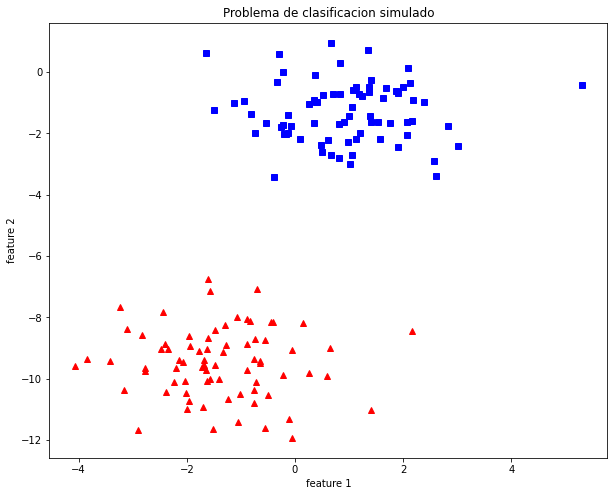

In [2]:
# Grafiquemos las instancias en el plano cartesiano, ya que tenemos solo 2 features.
import matplotlib.pyplot as plt #cargamos paquete para graficar

fig = plt.figure(figsize=(10,8))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'r^') 
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs') 
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title('Problema de clasificacion simulado')



In [3]:
# definamos nuestra funcion de activacion, que es simplemente z>=0, g(z) = 1,   y   si z<0, g(z) = 0

def step_func(z):
 return 1.0 if (z > 0) else 0.0

In [6]:
# ahora definamos el perceptron.
# recordemos que los pesos se actualizan de acuerdo a la regla:

# theta_j = theta_j + \nu(y_i - h_theta(x_i))*x_i     donde theta son los pesos, y es la output, y x es la entrada.

def perceptron(X, y, lr, epochs):
    # X --> Inputs.
    # y --> la clase.
    # lr --> learning rate.
    # epochs --> numero de iteraciones.
    # m-> numero de instancias de entrenamiento  # n-> numero de veatures
    m, n = X.shape
    
    # Inicializacion de parametros theta (pesos sinapticos) a cero. # +1 in n+1 for the bias term.
    theta = np.zeros((n+1,1))
    
    # Lista vacia para contar cuantas instancias estan mal clasificadas en cada iteracion. 
    n_miss_list = []
    
    # Entreanamiento.
    for epoch in range(epochs):
        # variable a almacenar #misclassified.
        n_miss = 0
        # looping para cada instancia.
        for idx, x_i in enumerate(X):   # enumerate da The *count* of the current iteration & *value* of the item at the current iteration
            # Insertar  1 para el bias, X0 = 1.
            x_i = np.insert(x_i, 0, 1).reshape(-1,1)  # fabrica una columan nueva con puros 1s para el bias.
            # aqui calculamos el output. Notar que la funcion es un escalon (step)
            y_hat = step_func(np.dot(x_i.T, theta))
            # Updating if the example is misclassified.
            if (np.squeeze(y_hat) - y[idx]) != 0: 
                theta += lr*((y[idx] - y_hat)*x_i)  # LA REGLA DE ENTRENAMIENTO!
                # incremento por 1 de los 
                n_miss += 1
        # anexamos el numero de malclasificados en cada iteracion 
        n_miss_list.append(n_miss)
    return theta, n_miss_list





In [10]:
# Y ademas vamos a definir una funcion par agraficar el decision boundary.

def plot_decision_boundary(X, theta):
    # X --> Inputs
    # theta --> parametros pesos
    # decison bpundari es y=mx+c
    # Igualamos mx+c = theta0.X0 + theta1.X1 + theta2.X2 # al resolver encntramos la pendiente m y la constante c.
    x1 = [min(X[:,0]), max(X[:,0])]
    m = -theta[1]/theta[2]
    c = -theta[0]/theta[2]
    x2 = m*x1 + c
    # Plotting
    fig = plt.figure(figsize=(10,8)) 
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "r^") 
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") 
    plt.xlabel("feature 1")
    plt.ylabel("feature 2") 
    plt.title('Perceptron')
    plt.plot(x1, x2, 'y-')




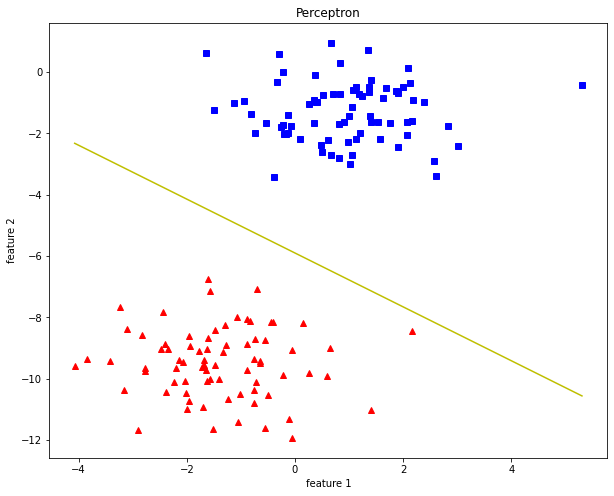

In [11]:
# ahora probemos con nuetros set de datos simulados X y clases y.

theta, miss_l = perceptron(X, y, 0.5, 100)
plot_decision_boundary(X, theta)

In [13]:
# veamos los pesos:

#print(miss_l)
print(theta)   contante o bias, w1 y w2.

[[5.        ]
 [0.7442977 ]
 [0.84692166]]


In [83]:
# pruebas
m, n = X.shape
lr = 0.5
epochs = 100

# pesos
theta = np.zeros((n+1,1))

    

In [36]:
#print(np.zeros((3,1)))
#print(theta)
b = enumerate(X)
print(b)

In [84]:
import pandas as pd
df = pd.DataFrame(columns = ['theta0', 'theta1', 'theta2'])

for idx, x_i in enumerate(X):
    #print(idx)
    #print(x_i)
    #xx_i = np.insert(x_i, 0, 1)     # formato [ 1.         -0.53278301 -1.64847081]    
    #print(xx_i)
    xx_i = np.insert(x_i, 0, 1).reshape(-1,1) # formato [[ 1.        ] [-0.53278301] [-1.64847081]]   (convertimos el array de shape (150,3) en 150 bloques de )
    #print(xx_i)
    y_hat = step_func(np.dot(xx_i.T, theta))
    #print(y_hat)
    #print(np.squeeze(y_hat) - y[idx])
    if (np.squeeze(y_hat) - y[idx]) != 0: 
                theta += lr*((y[idx] - y_hat)*xx_i) 
    #print(theta)
    #print(theta[1])
    df = df.append({'theta0' : float(theta[0]), 'theta1' : float(theta[1]), 'theta2' : float(theta[2]) }, ignore_index = True)

print(df)
#type(float( theta[1]))



     theta0    theta1    theta2
0       0.5 -0.266392 -0.824235
1       0.0  0.008722  4.984072
2       0.5  0.703033  4.266169
3       1.0  1.388203  3.946059
4       1.0  1.388203  3.946059
..      ...       ...       ...
145     5.0  0.744298  0.846922
146     5.0  0.744298  0.846922
147     5.0  0.744298  0.846922
148     5.0  0.744298  0.846922
149     5.0  0.744298  0.846922

[150 rows x 3 columns]


In [88]:
n_list = list(range(1, 151))
df['iter'] = n_list
print(df)

     theta0    theta1    theta2  iter
0       0.5 -0.266392 -0.824235     1
1       0.0  0.008722  4.984072     2
2       0.5  0.703033  4.266169     3
3       1.0  1.388203  3.946059     4
4       1.0  1.388203  3.946059     5
..      ...       ...       ...   ...
145     5.0  0.744298  0.846922   146
146     5.0  0.744298  0.846922   147
147     5.0  0.744298  0.846922   148
148     5.0  0.744298  0.846922   149
149     5.0  0.744298  0.846922   150

[150 rows x 4 columns]


<AxesSubplot:xlabel='iter'>

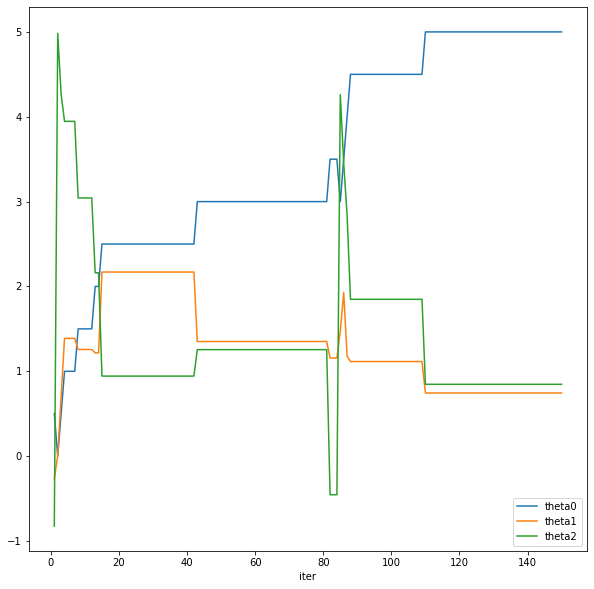

In [89]:
# grafiquemos la evolucion de los pesos

import matplotlib.pyplot as plt


df.plot(x="iter" , y=["theta0", "theta1", "theta2"], kind="line", figsize=(10, 10))
  


In [69]:
#type(theta)  # numpy.ndarray
#theta.ndim  #2
#theta.shape # (3, 1)
print(theta[2])



[0.84692166]


In [59]:
#np.array([[1,2,3,4,5], [6,7,8,9,10]])
np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])